Análise de dados de emissões de gases no Brasil por atividade no período de 2010 a 2019.
A base de dados foi obtida no site https://basedosdados.org/.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
emissoes_df = pd.read_csv('/content/drive/MyDrive/PROJETOS EDA/br_seeg_emissoes_brasil.csv')
emissoes_df.head()

,ano,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,produto,emissao
0,1970,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,230462.17
1,1971,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,226016.30
2,1972,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,220101.20
3,1973,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,214195.56
4,1974,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),NaN,NaN,186862.84


In [ ]:
emissoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454850 entries, 0 to 454849
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ano                  454850 non-null  int64  
 1   nivel_1              454850 non-null  object 
 2   nivel_2              454850 non-null  object 
 3   nivel_3              454850 non-null  object 
 4   nivel_4              454850 non-null  object 
 5   nivel_5              454850 non-null  object 
 6   nivel_6              454850 non-null  object 
 7   tipo_emissao         454850 non-null  object 
 8   gas                  454850 non-null  object 
 9   atividade_economica  453100 non-null  object 
 10  produto              268100 non-null  object 
 11  emissao              406325 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 41.6+ MB


In [ ]:
emissoes_df.shape

(454850, 12)

In [ ]:
emissoes_df.dtypes

,0
ano,int64
nivel_1,object
nivel_2,object
nivel_3,object
nivel_4,object
nivel_5,object
nivel_6,object
tipo_emissao,object
gas,object
atividade_economica,object


In [ ]:
#verificação de nulos
emissoes_df.isnull().sum()

,0
ano,0
nivel_1,0
nivel_2,0
nivel_3,0
nivel_4,0
nivel_5,0
nivel_6,0
tipo_emissao,0
gas,0
atividade_economica,1750


In [ ]:
# excluir coluna de  produto devido a quantidade de valores nulos

emissoes_df.drop(columns =['produto'], axis = 1, inplace = True)

In [ ]:
# excluir linhas com valores nulos
emissoes_df = emissoes_df.dropna()

In [ ]:
emissoes_df.isnull().sum()

,0
ano,0
nivel_1,0
nivel_2,0
nivel_3,0
nivel_4,0
nivel_5,0
nivel_6,0
tipo_emissao,0
gas,0
atividade_economica,0


In [ ]:
# remover valores negativos do df na coluna de emissao
emissoes_df = emissoes_df[(emissoes_df['emissao'] >= 0)]

In [ ]:
emissoes_df.shape

(377534, 11)

In [ ]:
# verificação de duplicatas
emissoes_df.duplicated().any()

False

In [ ]:
# renomear colunas do df para melhor entendimento dos dados

emissoes_df.rename(columns = {'nivel_1': 'setor', 'nivel_2': 'processo_emissor', 'nivel_3': 'forma_emissao', 'nivel_4': 'processo_especifico', 'nivel_5': 'tipo_atividade', 'nivel_6': 'atividade_especifica'}, inplace = True)

In [ ]:
emissoes_df.head()

,ano,setor,processo_emissor,forma_emissao,processo_especifico,tipo_atividade,atividade_especifica,tipo_emissao,gas,atividade_economica,emissao
350,1970,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Asinino,Emissão,CH4 (t),PEC,14204.460
351,1971,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Asinino,Emissão,CH4 (t),PEC,14573.875
352,1972,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Asinino,Emissão,CH4 (t),PEC,14943.290
353,1973,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Asinino,Emissão,CH4 (t),PEC,15312.705
354,1974,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Asinino,Emissão,CH4 (t),PEC,15682.120


In [ ]:
emissoes_df.tail()

,ano,setor,processo_emissor,forma_emissao,processo_especifico,tipo_atividade,atividade_especifica,tipo_emissao,gas,atividade_economica,emissao
454845,2015,Resíduos,Resíduos Sólidos,Tratamento Biológico de Resíduos Sólidos,Resíduos Sólidos Urbanos,Compostagem,NÃO SE APLICA,Emissão,N2O (t),SANEAMENTO,74.195798
454846,2016,Resíduos,Resíduos Sólidos,Tratamento Biológico de Resíduos Sólidos,Resíduos Sólidos Urbanos,Compostagem,NÃO SE APLICA,Emissão,N2O (t),SANEAMENTO,69.360711
454847,2017,Resíduos,Resíduos Sólidos,Tratamento Biológico de Resíduos Sólidos,Resíduos Sólidos Urbanos,Compostagem,NÃO SE APLICA,Emissão,N2O (t),SANEAMENTO,69.919672
454848,2018,Resíduos,Resíduos Sólidos,Tratamento Biológico de Resíduos Sólidos,Resíduos Sólidos Urbanos,Compostagem,NÃO SE APLICA,Emissão,N2O (t),SANEAMENTO,70.507559
454849,2019,Resíduos,Resíduos Sólidos,Tratamento Biológico de Resíduos Sólidos,Resíduos Sólidos Urbanos,Compostagem,NÃO SE APLICA,Emissão,N2O (t),SANEAMENTO,71.068872


In [ ]:
# filtragem do dataframe para obtenção dos dados entre 2010 e 2019

emissoes2010_2019_df = emissoes_df[(emissoes_df['ano'] >= 2010) & (emissoes_df['ano'] <= 2019)]
emissoes2010_2019_df.head()

,ano,setor,processo_emissor,forma_emissao,processo_especifico,tipo_atividade,atividade_especifica,tipo_emissao,gas,atividade_economica,emissao
390,2010,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Asinino,Emissão,CH4 (t),PEC,10015.87
391,2011,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Asinino,Emissão,CH4 (t),PEC,9746.88
392,2012,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Asinino,Emissão,CH4 (t),PEC,9027.16
393,2013,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Asinino,Emissão,CH4 (t),PEC,8571.30
394,2014,Agropecuária,Fermentação Entérica,Diretas,Outros,Animal,Asinino,Emissão,CH4 (t),PEC,8115.45


#**Análises:**


* Qual setor foi o responsável pelo maior emissão de gases nesse período?

In [ ]:
emissoes_setor = emissoes2010_2019_df.groupby('setor')['emissao'].sum().reset_index()
emissoes_setor = emissoes_setor.sort_values(by = 'emissao', ascending= False)
setor_maximo = emissoes_setor.iloc[0]
print(f'O setor com maior emissão de gases do efeito estufa foi {setor_maximo["setor"]} com um total de emissões de {setor_maximo["emissao"]}.')

O setor com maior emissão de gases do efeito estufa foi Mudança de Uso da Terra e Floresta com um total de emissões de 110621101590.1922.


Segundo o Portal Unicamp  "o uso da terra e sua mudança podem atuar como fonte de emissões e, ao mesmo tempo, como sumidouros de carbono. Estima-se que algo em torno de um quinto das emissões globais de carbono sejam derivadas de atividades relacionadas com o uso da terra (desmatamento, queimadas etc)".

In [ ]:
print('Os demais setores apresentaram tais valores: ')
print(emissoes_setor[1:])

Os demais setores apresentaram tais valores: 
                   setor       emissao
1                Energia  3.039714e+10
0           Agropecuária  2.920062e+10
3  Processos Industriais  6.504194e+09
4              Resíduos   2.885594e+09


<ipython-input-120-eb2637d1fea8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'setor', y = 'emissao', data = emissoes_setor, palette = 'hls')


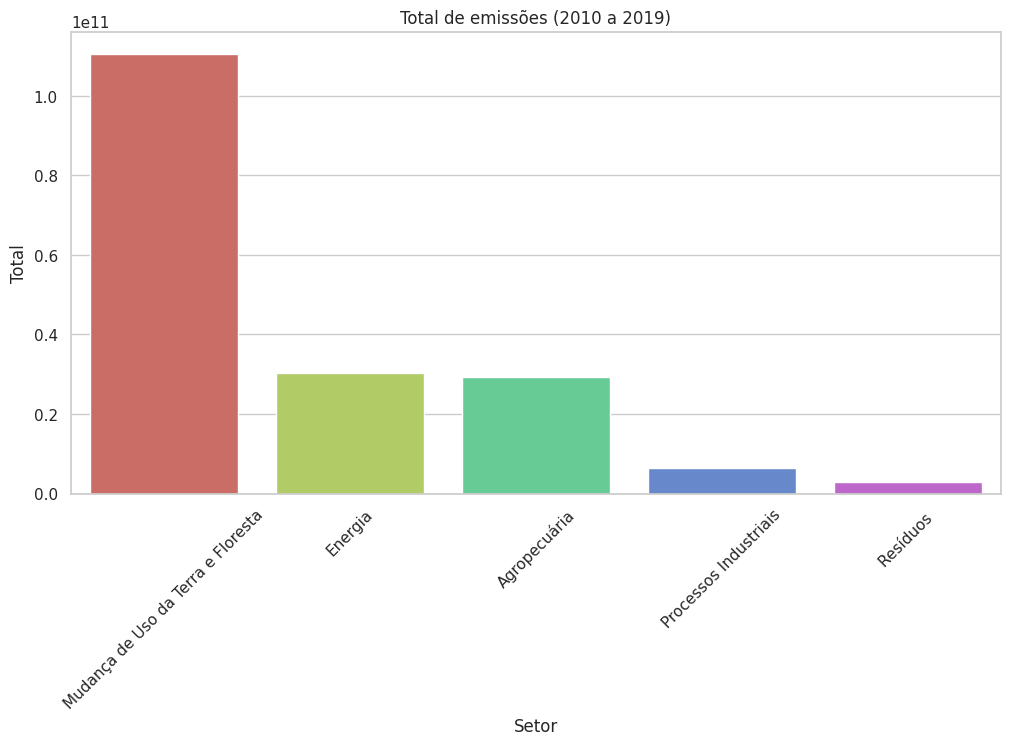

In [ ]:
plt.figure(figsize = (12,6))
sns.set_theme(style="whitegrid")
sns.barplot(x = 'setor', y = 'emissao', data = emissoes_setor, palette = 'hls')
plt.title('Total de emissões (2010 a 2019)')
plt.xlabel('Setor')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

* Principais processos emissores e atividades específicas dentro do setor de Mudança de Uso da Terra e Flores

Processos emissores:

In [ ]:
emissoes_mudanca_terra = emissoes2010_2019_df[emissoes2010_2019_df['setor'] == 'Mudança de Uso da Terra e Floresta']
processos_emissores = emissoes_mudanca_terra.groupby('processo_emissor')['emissao'].sum().reset_index()
processos_emissores = processos_emissores.sort_values(by = 'emissao', ascending= False)
print(processos_emissores)

                      processo_emissor       emissao
0            Alterações de Uso do Solo  1.061937e+11
3                  Resíduos Florestais  4.427386e+09
1  Remoção por Mudança de Uso da Terra  0.000000e+00
2     Remoção por Vegetação Secundária  0.000000e+00


Top 3 atividades específicas dentro do setor:

In [ ]:
atividades_especificas = emissoes_mudanca_terra.groupby('atividade_especifica')['emissao'].sum().reset_index()
atividades_especificas = atividades_especificas.sort_values(by = 'emissao', ascending= False)
print(atividades_especificas[0:3])

                      atividade_especifica       emissao
6                            NÃO SE APLICA  6.169377e+10
1    Floresta primária -- Uso agropecuário  4.057746e+10
4  Floresta secundária -- Uso agropecuário  3.400380e+09


Observa-se que as 3 principais atividades específicas dentro do setor de mudança do uso da terra estão relacionados ao uso de floresta primária e secundária pela agropecuária.

Principal atividade econômica dentro do setor:

In [ ]:
atividades_economicas = emissoes_mudanca_terra.groupby('atividade_economica')['emissao'].sum().reset_index()
atividades_economicas = atividades_economicas.sort_values(by = 'emissao', ascending= False)
print(atividades_economicas.iloc[0])

atividade_economica              AGROPEC
emissao                110621101590.1922
Name: 0, dtype: object


* Qual processo emissor foi o responsável pela maior emissão de gases nesse período?

In [ ]:
processo_emissor_2010_2019 = emissoes2010_2019_df.groupby('processo_emissor')['emissao'].sum().reset_index()
processo_emissor_2010_2019 = processo_emissor_2010_2019.sort_values(by='emissao', ascending= False)
processo_emissor_maior = processo_emissor_2010_2019.iloc[0]
print(f'O processo com maior emissão de gases do efeito estufa foi {processo_emissor_maior["processo_emissor"]} com um total de emissões de {processo_emissor_maior["emissao"]}.')

O processo com maior emissão de gases do efeito estufa foi Alterações de Uso do Solo com um total de emissões de 106193715949.3.


In [ ]:
print('Os demais processos apresentaram tais valores:')
print(processo_emissor_2010_2019[1:])

Os demais processos apresentaram tais valores:
                                     processo_emissor       emissao
4                Emissões pela Queima de Combustíveis  2.902945e+10
15                                    Solos Manejados  1.656398e+10
5                                Fermentação Entérica  1.160393e+10
13                                Resíduos Florestais  4.427386e+09
9                                  Produção de Metais  3.521855e+09
8                                   Produtos Minerais  2.058770e+09
14                                   Resíduos Sólidos  1.861889e+09
2                                  Emissões Fugitivas  1.367695e+09
1                                  Efluentes Liquidos  1.023705e+09
7                           Manejo de Dejetos Animais  7.693210e+08
3                                    Emissões de HFCs  5.674041e+08
10                       Queima de Resíduos Agrícolas  2.633890e+08
6                                   Indústria Química  2.443824e+08
1

* Avaliar o top 10 de total de emissão por forma de emissão

In [ ]:
total_emissoes_forma = emissoes2010_2019_df.groupby('forma_emissao')['emissao'].sum().reset_index()
total_emissoes_forma = total_emissoes_forma.sort_values(by='emissao', ascending = False)
print(total_emissoes_forma[0:10])

                                forma_emissao       emissao
1                                    Amazônia  7.117611e+10
7                                     Diretas  2.775077e+10
3                                     Cerrado  2.031222e+10
59                                Transportes  1.527565e+10
19                                      Pampa  7.554298e+09
16                             Mata Atlântica  5.227664e+09
15                                 Industrial  5.154751e+09
2                                    Caatinga  4.465999e+09
32                   Produção de Combustíveis  3.845178e+09
12  Geração de Eletricidade (Serviço Público)  3.063276e+09


<ipython-input-148-3ca01536d378>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = 'forma_emissao', x = 'emissao', data = total_emissoes_forma[0:10], palette = 'hls')


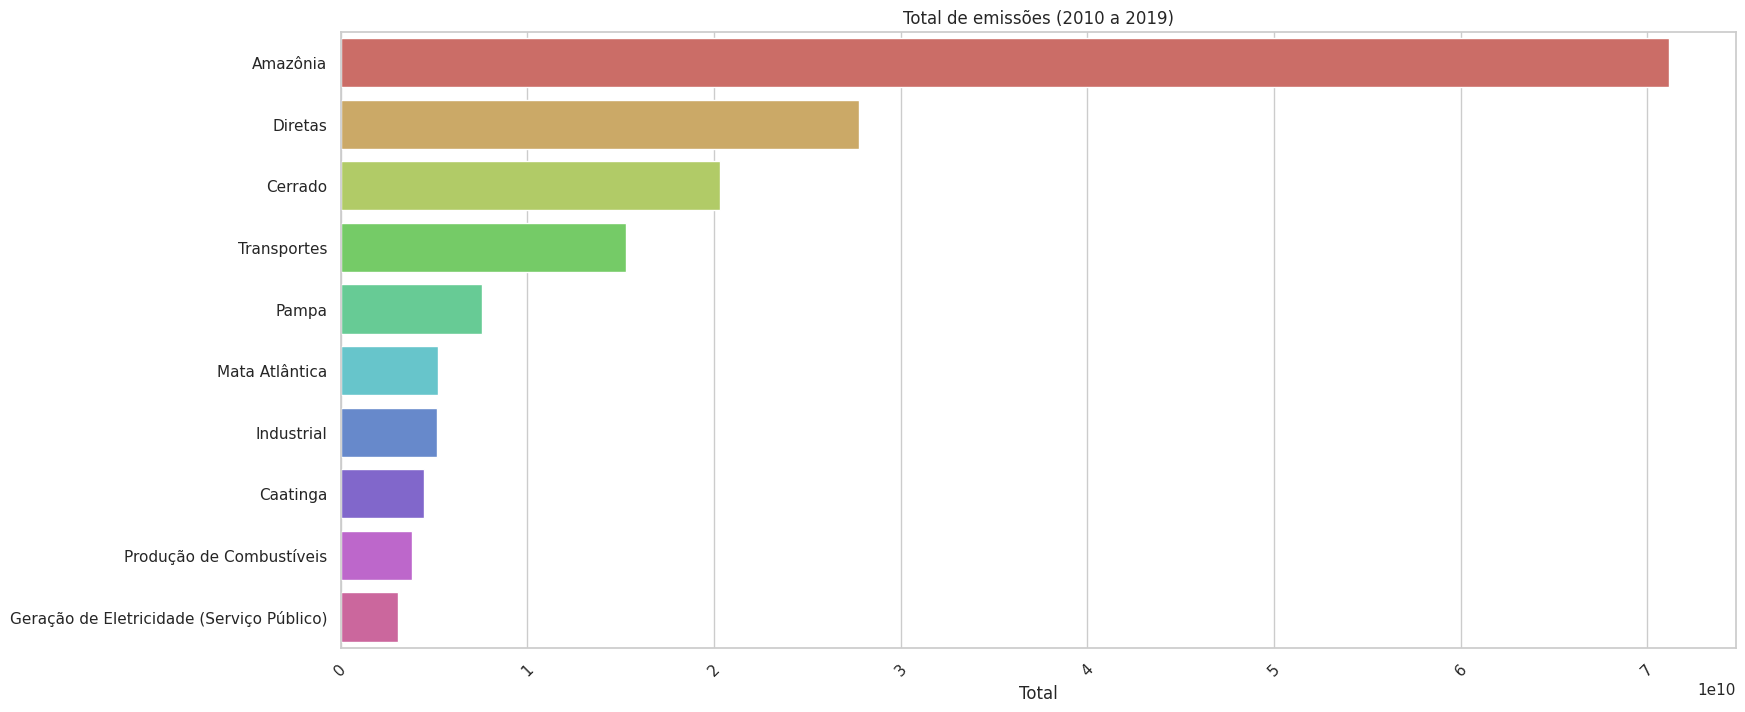

In [ ]:
plt.figure(figsize = (18,8))
sns.set_theme(style="whitegrid")
sns.barplot(y = 'forma_emissao', x = 'emissao', data = total_emissoes_forma[0:10], palette = 'hls')
plt.title('Total de emissões (2010 a 2019)')
plt.xlabel('Total')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

* Total de emissão por tipo de atividade

In [ ]:
emissoes_tipo_atividade = emissoes2010_2019_df.groupby('tipo_atividade')['emissao'].sum().reset_index()
emissoes_tipo_atividade = emissoes_tipo_atividade.sort_values(by='emissao', ascending = False)
top3_tipo_atividade = emissoes_tipo_atividade[0:3]
print(top3_tipo_atividade)

   tipo_atividade       emissao
21   Desmatamento  1.057621e+11
1          Animal  1.643399e+10
57        Vegetal  1.042996e+10


<ipython-input-177-1ee680388cbf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'tipo_atividade', y = 'emissao', data = top3_tipo_atividade, palette = 'hls')


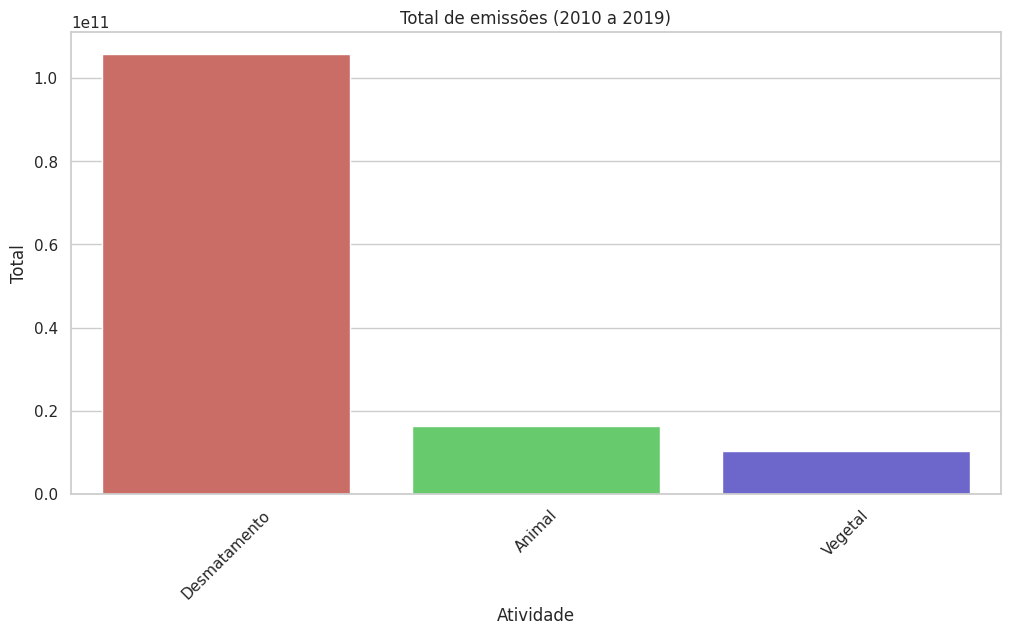

In [ ]:
plt.figure(figsize = (12,6))
sns.set_theme(style="whitegrid")
sns.barplot(x = 'tipo_atividade', y = 'emissao', data = top3_tipo_atividade, palette = 'hls')
plt.title('Total de emissões (2010 a 2019)')
plt.xlabel('Atividade')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

* Quais foram os 10 gases mais emitidos nesse período?

In [ ]:
gases_total_emissoes = emissoes2010_2019_df.groupby('gas')['emissao'].sum().reset_index()
gases_total_emissoes = gases_total_emissoes.sort_values(by='emissao', ascending= False)
gases_top10 = gases_total_emissoes[0:10]
print(gases_top10)

                 gas       emissao
10  CO2e (t) GWP-AR5  2.909567e+10
9   CO2e (t) GWP-AR4  2.861320e+10
8   CO2e (t) GWP-AR2  2.784800e+10
5   CO2e (t) GTP-AR2  2.419609e+10
6   CO2e (t) GTP-AR4  2.419609e+10
7   CO2e (t) GTP-AR5  2.376743e+10
4            CO2 (t)  2.146448e+10
2            CH4 (t)  2.064215e+08
3             CO (t)  1.258453e+08
11         COVNM (t)  5.697538e+07


<ipython-input-151-c9538cee48f7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'gas', y = 'emissao', data = gases_top10, palette = 'hls')


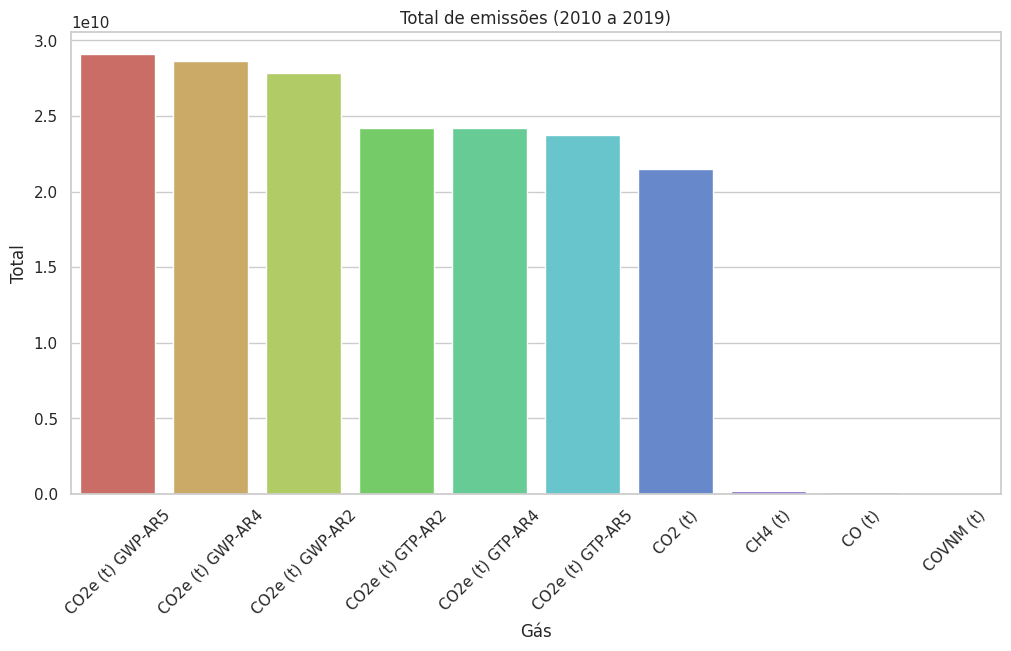

In [ ]:
plt.figure(figsize = (12,6))
sns.set_theme(style="whitegrid")
sns.barplot(x = 'gas', y = 'emissao', data = gases_top10, palette = 'hls')
plt.title('Total de emissões (2010 a 2019)')
plt.xlabel('Gás')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

* Média de emissões por ano para o gás CO2et GWP-AR5

In [ ]:
gas_co2 = emissoes2010_2019_df[emissoes2010_2019_df['gas'] == 'CO2e (t) GWP-AR5']
media_gasco2 = gas_co2.groupby('ano')['emissao'].mean().reset_index()
print(media_gasco2)

    ano       emissao
0  2010  3.084778e+06
1  2011  3.085091e+06
2  2012  3.147101e+06
3  2013  3.483735e+06
4  2014  3.364798e+06
5  2015  3.467646e+06
6  2016  3.617040e+06
7  2017  3.485310e+06
8  2018  3.374883e+06
9  2019  3.905184e+06


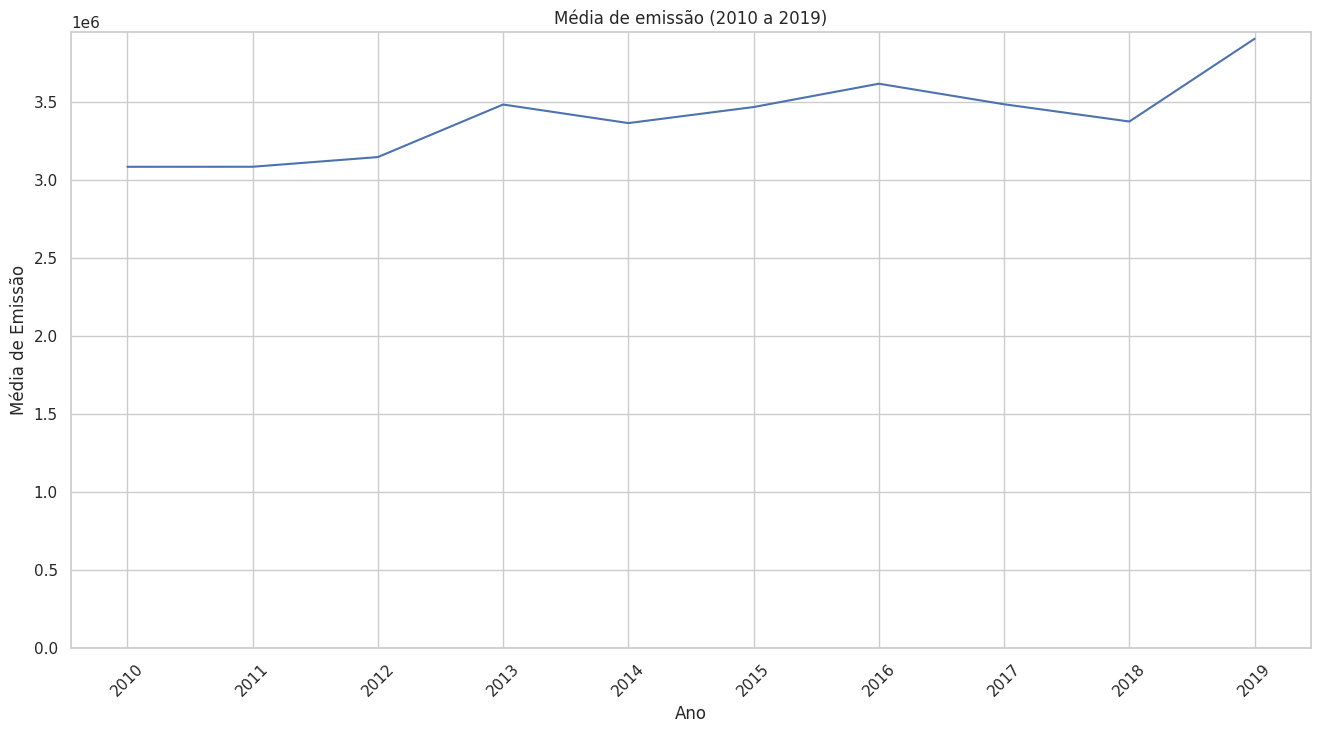

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (16,8))
sns.lineplot(x="ano", y="emissao", data= media_gasco2)
plt.title('Média de emissão (2010 a 2019)')
plt.xticks(media_gasco2['ano'])
plt.xlabel('Ano')
plt.ylabel('Média de Emissão')
plt.xticks(rotation=45)
plt.ylim(0, None)
plt.show()

Observa-se que a média de emissões para esse gás aumentou de 2010 a 2019, oscilou em alguns anos, como, por exemplo, no ano de 2018 houve uma redução em relação a 2017, contudo, o valor aumentou em 2019, atigindo a maior média registrada no período analisado.

* Análise de série temporal com o total de emissões por ano

In [ ]:
emissoes_total_anual = emissoes2010_2019_df.groupby('ano')['emissao'].sum().reset_index()
print(emissoes_total_anual)

    ano       emissao
0  2010  1.606262e+10
1  2011  1.610308e+10
2  2012  1.644472e+10
3  2013  1.841354e+10
4  2014  1.773006e+10
5  2015  1.825077e+10
6  2016  1.905220e+10
7  2017  1.837820e+10
8  2018  1.778087e+10
9  2019  2.139260e+10


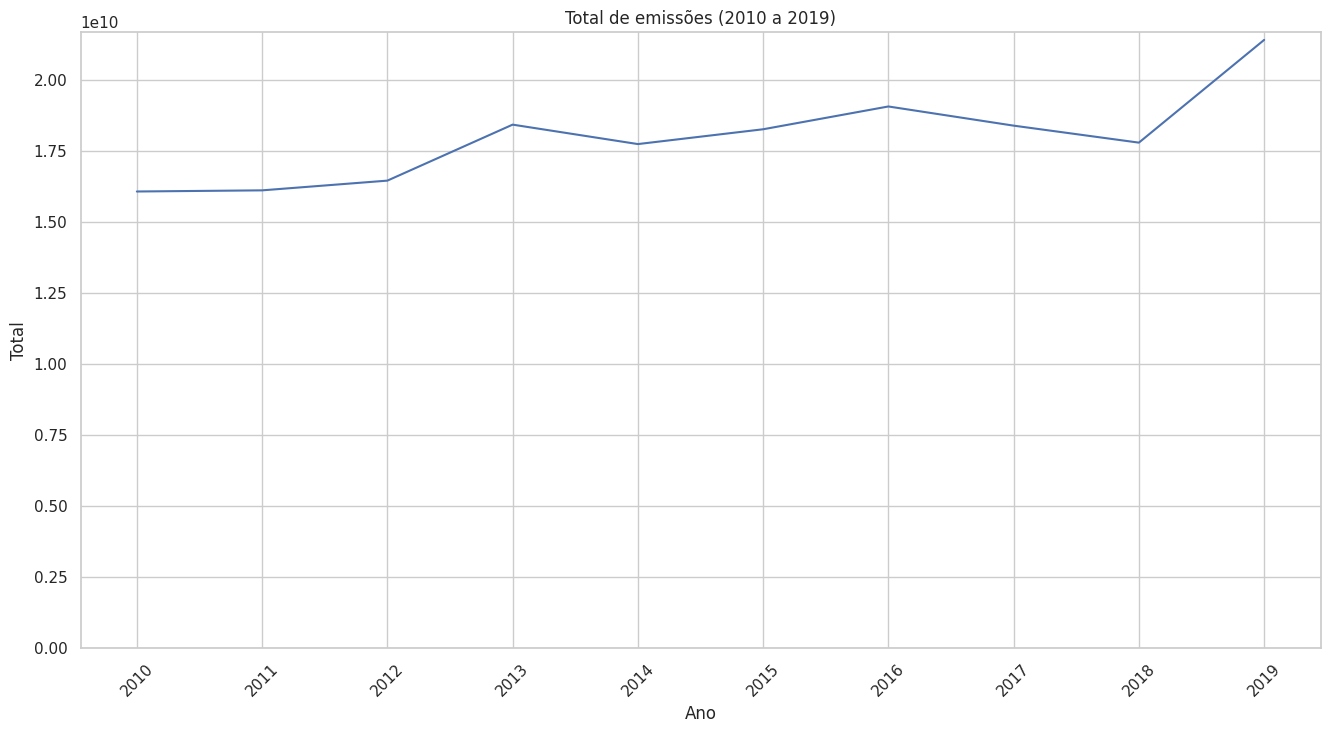

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (16,8))
sns.lineplot(x="ano", y="emissao", data= emissoes_total_anual)
plt.title('Total de emissões (2010 a 2019)')
plt.xticks(emissoes_total_anual['ano'])
plt.xlabel('Ano')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.ylim(0, None)
plt.show()